In [2]:
import pandas as pd
data_path=('parkinsons.data')
parkinson_data= pd.read_csv(data_path)
parkinson_data.drop(columns=['name'], inplace=True)
parkinson_data.rename(columns={'MDVP:Fo(Hz)': 'MDVP_Fo_Hz',
                             'MDVP:Fhi(Hz)': 'MDVP_Fhi_Hz',
                             'MDVP:Flo(Hz)': 'MDVP_Flo_Hz',
                             'MDVP:Jitter(%)': 'MDVP_Jitter',
                             'MDVP:Jitter(Abs)': 'MDVP_Jitter_Abs',
                             'MDVP:RAP': 'MDVP_RAP',
                             'MDVP:PPQ': 'MDVP_PPQ',
                             'Jitter:DDP': 'Jitter_DDP',
                             'MDVP:Shimmer': 'MDVP_Shimmer',
                             'MDVP:Shimmer(dB)': 'MDVP_Shimmer_dB',
                             'Shimmer:APQ3': 'Shimmer_APQ3',
                             'Shimmer:APQ5': 'Shimmer_APQ5',
                             'MDVP:APQ': 'MDVP_APQ',
                             'Shimmer:DDA': 'Shimmer_DDA'}, inplace=True)

class_distribution = parkinson_data['status'].value_counts()
print(class_distribution)
print(parkinson_data.head())

status
1    147
0     48
Name: count, dtype: int64
   MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter  MDVP_Jitter_Abs  \
0     119.992      157.302       74.997      0.00784          0.00007   
1     122.400      148.650      113.819      0.00968          0.00008   
2     116.682      131.111      111.555      0.01050          0.00009   
3     116.676      137.871      111.366      0.00997          0.00009   
4     116.014      141.781      110.655      0.01284          0.00011   

   MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  MDVP_Shimmer_dB  ...  \
0   0.00370   0.00554     0.01109       0.04374            0.426  ...   
1   0.00465   0.00696     0.01394       0.06134            0.626  ...   
2   0.00544   0.00781     0.01633       0.05233            0.482  ...   
3   0.00502   0.00698     0.01505       0.05492            0.517  ...   
4   0.00655   0.00908     0.01966       0.06425            0.584  ...   

   Shimmer_DDA      NHR     HNR  status      RPDE       DFA   spread1  

In [3]:
print(parkinson_data.shape)

(195, 23)


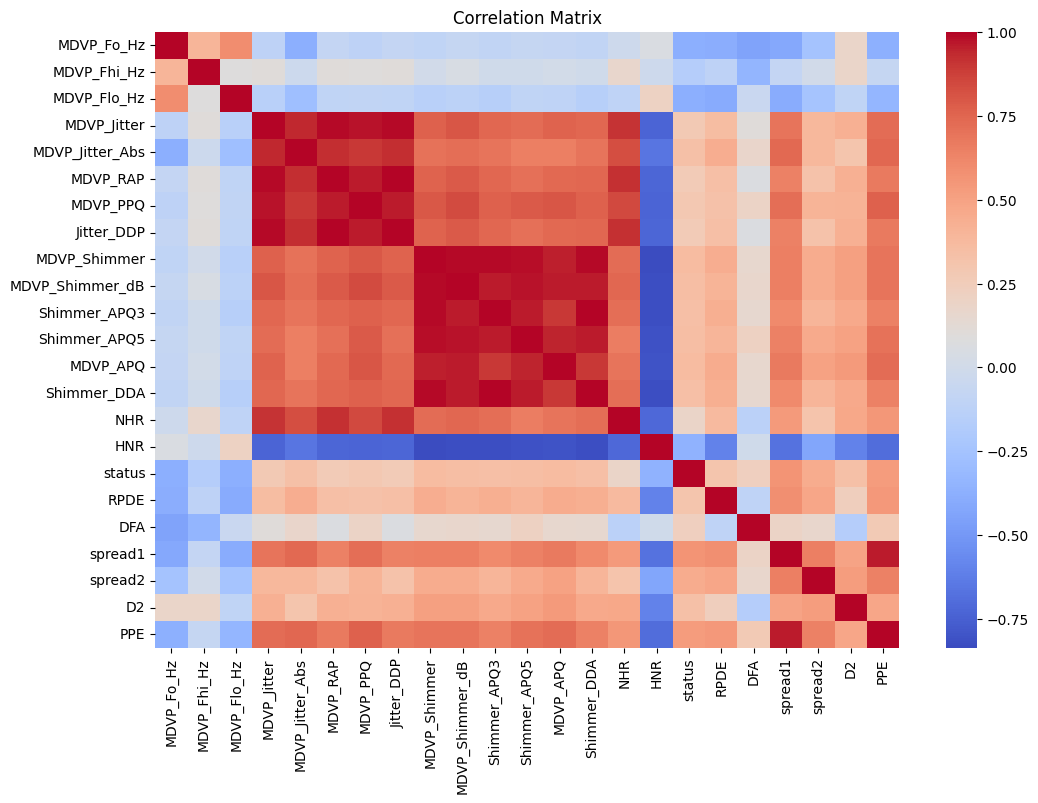

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = parkinson_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

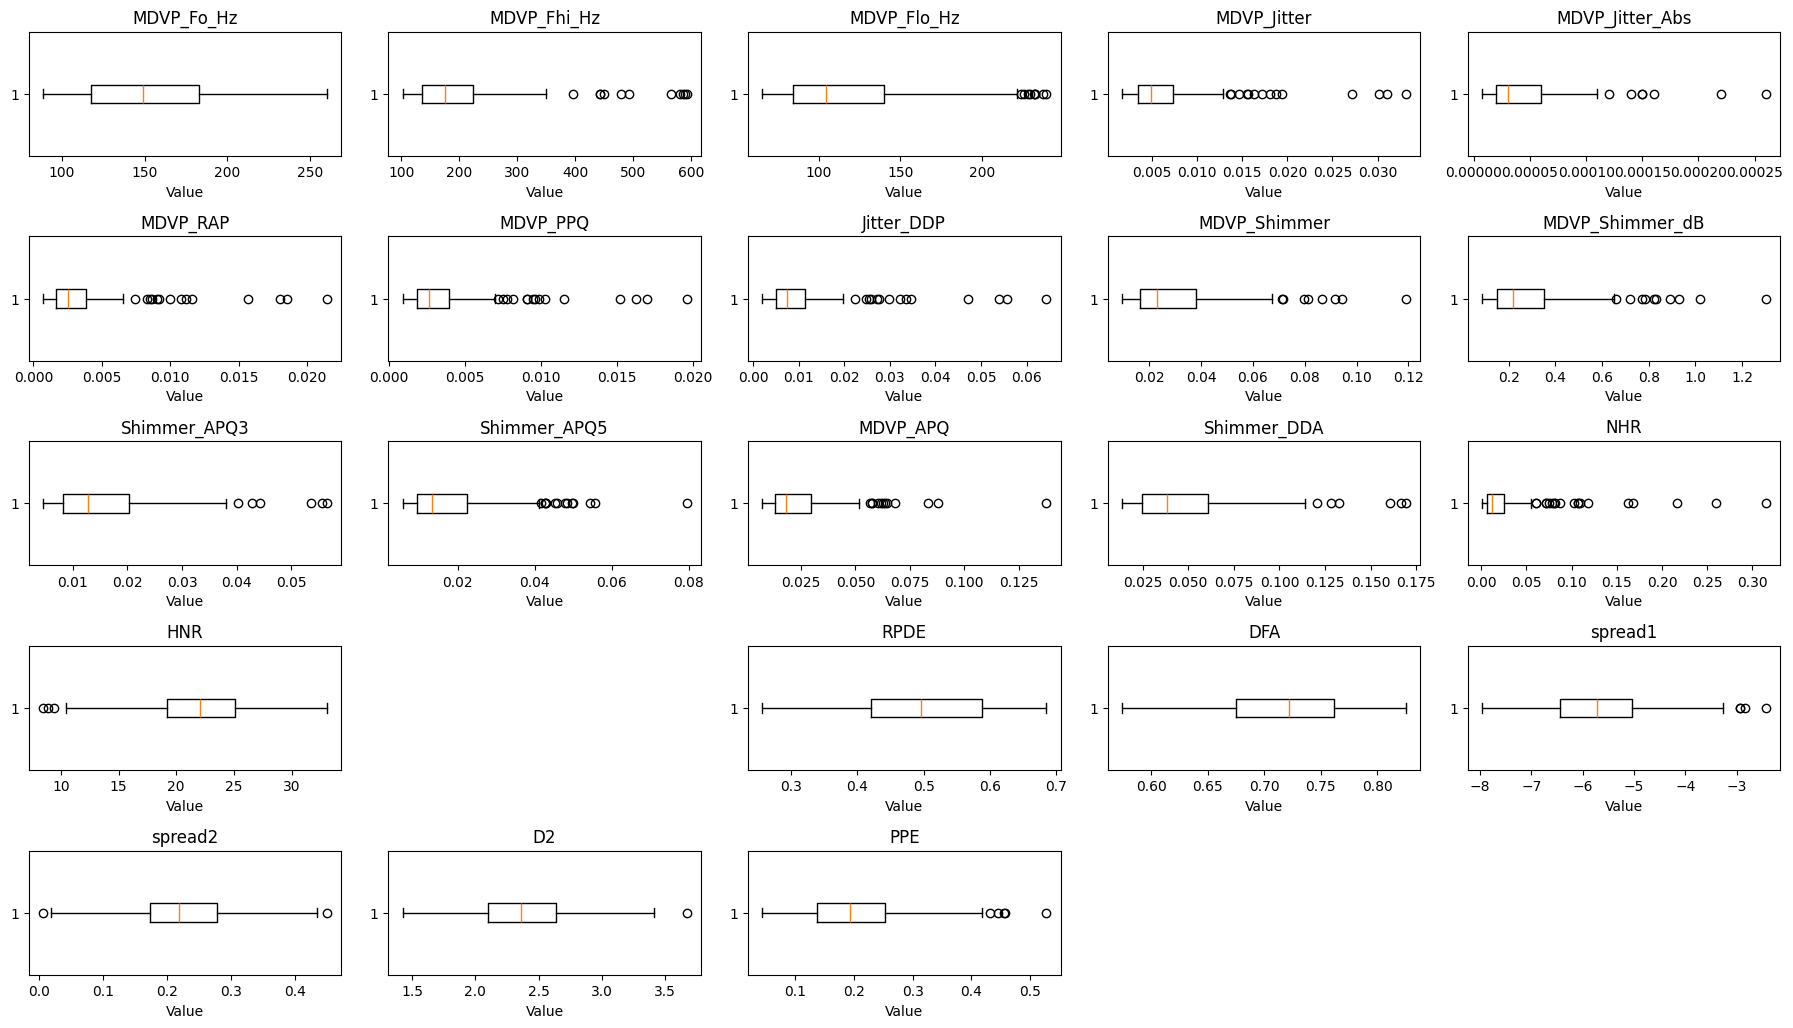

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
for i, feature in enumerate(parkinson_data.columns):
    if feature != 'status':
        plt.subplot(6, 5, i + 1)
        plt.boxplot(parkinson_data[feature], vert=False)
        plt.title(feature)
        plt.xlabel("Value")
plt.tight_layout()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import pandas as pd

X = parkinson_data.drop("status", axis=1)
Y = parkinson_data["status"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Eğitim seti boyutu:", X_train.shape[0])
print("Test seti boyutu:", X_test.shape[0])

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

train_set = X_train.copy()
train_set['status'] = Y_train

test_set = X_test.copy()
test_set['status'] = Y_test

overlap = pd.merge(train_set, test_set, how='inner', on=train_set.columns.tolist())

if not overlap.empty:
    print("Overlap:")
    print(overlap)
else:
    print("No overlap")


Eğitim seti boyutu: 156
Test seti boyutu: 39
Accuracy: 0.9487179487179487
Precision: 0.9411764705882353
Recall: 1.0
F1 Score: 0.9696969696969697

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Eğitim ve test setlerinde overlap bulunmamaktadır.
